# Loading packages

In [38]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [40]:
## basic + datetime 
import pandas as pd
import numpy as np
import time
from datetime import date, timedelta, datetime
from datetime import datetime


## data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Dispaly max column
pd.pandas.set_option('display.max_columns',None)
## Display max rows
#pd.pandas.set_option('display.max_rows', None)

## for statistical purposes and the dataset
from statsmodels.tsa.stattools import adfuller

## time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

## for evaluation of the models
from sklearn.metrics import mean_squared_error



# prophet by Facebook
from prophet import Prophet

## custom functions
from pandas import util

## Others
import warnings
warnings.filterwarnings("ignore")

import os
import logging
logging.basicConfig(level=os.environ.get("LOGLEVEL", "INFO"))

In [41]:
#Logger
log = logging.getLogger()
log.info('check')

INFO:root:check


# Exploratory Data Analysis
**In this first section data cleaning tasks such as understanding data information,handling missing value, data exploration and extraction, checking distribution of variables,filling null values,correlational Analysis will be performed on the data.**

In [42]:
## loading store data using pandas library
store_df = pd.read_csv("store.csv")

## loading train data using pandas library
train_df = pd.read_csv("train.csv")

## loading test data using pandas library
test_df = pd.read_csv("test.csv")

In [44]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [45]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [46]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


### Shape of Dataset

In [47]:
## getting number of data points in the store data
print(f"There are {store_df.shape[0]} rows and {store_df.shape[1]} columns in the store dataset")

## getting number of data points in the train data
print(f"\nThere are {train_df.shape[0]} rows and {train_df.shape[1]} columns in the train dataset")

## getting number of data points in the test data
print(f"\nThere are {test_df.shape[0]} rows and {test_df.shape[1]} columns in the test dataset")

There are 1115 rows and 10 columns in the store dataset

There are 1017209 rows and 9 columns in the train dataset

There are 41088 rows and 8 columns in the test dataset


### Store data information

In [49]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### Train data information

In [50]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


### Train data information

In [52]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


### Data Exploration and Extraction
__Splitting a-date-column-into-separate-day-month-year-column-in-pandas__

In [53]:
## time series as indexes
train_df.index

RangeIndex(start=0, stop=1017209, step=1)

In [54]:
## time series as indexes
train_df.index

## preparation: input should be float type
## data extraction
train_df['Date'] = pd.to_datetime(train_df['Date'])
train_df['Year'] = train_df['Date'].dt.year
train_df['Month'] = train_df['Date'].dt.month
train_df['Day'] = train_df['Date'].dt.day
train_df['WeekOfYear'] = train_df['Date'].dt.isocalendar().week#ofyear
train_df['WeekofMonth'] = train_df['Date'].dt.day//7 + 1
len(train_df['Date'].dt.isocalendar().week)
train_df['Date'].dt.isocalendar().week

## adding new variable
train_df['SalePerCustomer'] = train_df['Sales'] / train_df['Customers']

## descriptive statistics
train_df['SalePerCustomer'].describe()

count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
Name: SalePerCustomer, dtype: float64

### Checking null percentages

In [55]:
def get_null_percentage(df):
    total_null = df.isnull().sum().sum()
    total_values = df.size
    null_percentage = (total_null / total_values) * 100
    return round(null_percentage, 2)

store_null_percentage = get_null_percentage(store_df)
train_null_percentage = get_null_percentage(train_df)
test_null_percentage = get_null_percentage(test_df)

print(f"Store Null Percentage: {store_null_percentage} %")
print(f"Train Null Percentage: {train_null_percentage} %")
print(f"Test Null Percentage: {test_null_percentage} %")

Store Null Percentage: 21.01 %
Train Null Percentage: 1.13 %
Test Null Percentage: 0.0 %


### View null columns count for store train and test

In [56]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [57]:
train_df.isnull().sum()

Store                   0
DayOfWeek               0
Date                    0
Sales                   0
Customers               0
Open                    0
Promo                   0
StateHoliday            0
SchoolHoliday           0
Year                    0
Month                   0
Day                     0
WeekOfYear              0
WeekofMonth             0
SalePerCustomer    172869
dtype: int64

In [58]:
test_df.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

### Filling null values of train , store and test.

In [59]:
## No particular pattern observed. In this case, it makes a complete sense to replace NaN with the median values
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

In [60]:
store_df.fillna(0, inplace = True)
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [61]:
## No particular pattern observed. In this case, it makes a complete sense to replace NaN with the median values
train_df['SalePerCustomer'].fillna(train_df['SalePerCustomer'].median(), inplace = True)

In [62]:
train_df.isnull().sum()

Store              0
DayOfWeek          0
Date               0
Sales              0
Customers          0
Open               0
Promo              0
StateHoliday       0
SchoolHoliday      0
Year               0
Month              0
Day                0
WeekOfYear         0
WeekofMonth        0
SalePerCustomer    0
dtype: int64

In [63]:
## The Open column is not continuous data, then filling the missing values with Mode method
test_df.Open.fillna(test_df.Open.mode()[0],inplace=True)

In [64]:
test_df.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [65]:
def get_null_percentage(df):
    total_null = df.isnull().sum().sum()
    total_values = df.size
    null_percentage = (total_null / total_values) * 100
    return null_percentage

store_null_percentage = get_null_percentage(store_df)
train_null_percentage = get_null_percentage(train_df)
test_null_percentage = get_null_percentage(test_df)

print(f"Store Null Percentage: {store_null_percentage} %")
print(f"Train Null Percentage: {train_null_percentage} %")
print(f"Test Null Percentage: {test_null_percentage} %")

## Save the cleaned store dataframe to a CSV file
store_df.to_csv('clean_store.csv', index=False)
train_df.to_csv('clean_train.csv', index=False)
test_df.to_csv('clean_test.csv', index=False)

Store Null Percentage: 0.0 %
Train Null Percentage: 0.0 %
Test Null Percentage: 0.0 %


In [66]:
# ## Closed stores with no sales will not be counted for forcaset
# train_df = train_df[(train_df.Open != 0) & (train_df.Sales != 0)]
# train_df.shape#.head()

In [68]:
# Define a function to add a month and year column to a DataFrame
def add_month_year(df):
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    return df

# Call the function to add the month and year columns to the train_df DataFrame
train_df = add_month_year(train_df)

# Display the first few rows of the DataFrame
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,WeekofMonth,SalePerCustomer
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31,5,9.482883
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31,5,9.702400
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31,5,10.126675
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31,5,9.342457
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31,5,8.626118


### Joining train data set with an additional store data information.

In [70]:
## by specifying inner join we make sure that only those observations 
## that are present in both train and store sets are merged together
print("In total: ", train_df.shape)
train_store = pd.merge(train_df, store_df, how='inner', on='Store')
train_store['StateHoliday'] = train_store['StateHoliday'].apply(lambda x: str(x))
train_store#.head()

In total:  (1017209, 15)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,WeekofMonth,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31,5,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,2015,7,30,31,5,9.194139,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,2015,7,29,31,5,9.143403,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,2015,7,28,31,5,8.948214,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,2015,7,27,31,4,9.970588,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,2013,1,5,1,1,14.073746,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,2013,1,4,1,1,13.926380,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,2013,1,3,1,1,14.323333,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,2013,1,2,1,1,12.121311,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [71]:
print(f"Null Percentage of Train and Store : {get_null_percentage(train_store)} %")
train_store.to_csv('train_store_merged.csv', index=False)

Null Percentage of Train and Store : 0.0 %


In [72]:
## time series as indexes
train_df.index

## preparation: input should be float type
## data extraction
test_df['Date'] = pd.to_datetime(test_df['Date'])
test_df['Year'] = test_df['Date'].dt.year
test_df['Month'] = test_df['Date'].dt.month
test_df['Day'] = test_df['Date'].dt.day
test_df['WeekOfYear'] = test_df['Date'].dt.isocalendar().week
test_df['WeekofMonth'] = test_df['Date'].dt.day//7 + 1
#len(test_df['Date'].dt.isocalendar().week)
#test_df['Date'].dt.isocalendar().week

In [73]:
def add_month_year(df):
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month   
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week
    df['Day'] = df['Date'].dt.day
    return df

## Call the function to add the month and year columns to the test_df DataFrame
test_df = add_month_year(test_df)

## Display the first few rows of the DataFrame
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,WeekofMonth
0,1,1,4,2015-09-17,1.0,1,0,0,2015,9,17,38,3
1,2,3,4,2015-09-17,1.0,1,0,0,2015,9,17,38,3
2,3,7,4,2015-09-17,1.0,1,0,0,2015,9,17,38,3
3,4,8,4,2015-09-17,1.0,1,0,0,2015,9,17,38,3
4,5,9,4,2015-09-17,1.0,1,0,0,2015,9,17,38,3


### Joining test data set with an additional store data information.

In [74]:
## by specifying inner join we make sure that only those observations 
## that are present in both test and store sets are merged together
print("In total: ", test_df.shape)
test_store = pd.merge(test_df, store_df, how='inner', on='Store')
test_store['StateHoliday'] = test_store['StateHoliday'].apply(lambda x: str(x))
test_store#.head()

In total:  (41088, 13)


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,WeekofMonth,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,2015,9,17,38,3,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,857,1,3,2015-09-16,1.0,1,0,0,2015,9,16,38,3,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1713,1,2,2015-09-15,1.0,1,0,0,2015,9,15,38,3,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,2569,1,1,2015-09-14,1.0,1,0,0,2015,9,14,38,3,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,3425,1,7,2015-09-13,0.0,0,0,0,2015,9,13,37,2,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,37664,1115,3,2015-08-05,1.0,1,0,1,2015,8,5,32,1,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
41084,38520,1115,2,2015-08-04,1.0,1,0,1,2015,8,4,32,1,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
41085,39376,1115,1,2015-08-03,1.0,1,0,1,2015,8,3,32,1,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
41086,40232,1115,7,2015-08-02,0.0,0,0,1,2015,8,2,31,1,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [75]:
print(f"Null Percentage of test and Store : {get_null_percentage(train_store)} %")
test_store.to_csv('clean_test_store.csv', index=False)

Null Percentage of test and Store : 0.0 %


## Checking the distribution of sales among Store types
In this section we will closely look at different levels of StoreType and how the main metric Sales is distributed among them.

In [32]:
train_store.groupby('StoreType')['Sales'].describe().reset_index()

,StoreType,count,mean,std,min,25%,50%,75%,max
0,a,551627.0,5738.179710,3964.028134,0.0,3508.0,5618.0,7860.00,41551.0
1,b,15830.0,10058.837334,5280.525506,0.0,6227.0,9025.5,13082.75,38722.0
2,c,136840.0,5723.629246,3721.700886,0.0,3789.0,5766.0,7849.00,31448.0
3,d,312912.0,5641.819243,3473.393781,0.0,3986.0,5826.0,7691.00,38037.0


__StoreType 'b' has the highest average of Sales among all others, however we have much less data for it. So let's print an overall sum of Sales and Customers to see which StoreType is the most selling and crowded one:__

In [33]:
train_store.groupby('StoreType')[['Customers', 'Sales']].sum().reset_index()

,StoreType,Customers,Sales
0,a,363541434,3165334859
1,b,31465621,159231395
2,c,92129705,783221426
3,d,156904995,1765392943


__Clearly stores of type A. StoreType D goes on the second place in both Sales and Customers. What about date periods? Seaborn's catplot grid is the best tool for this task:__

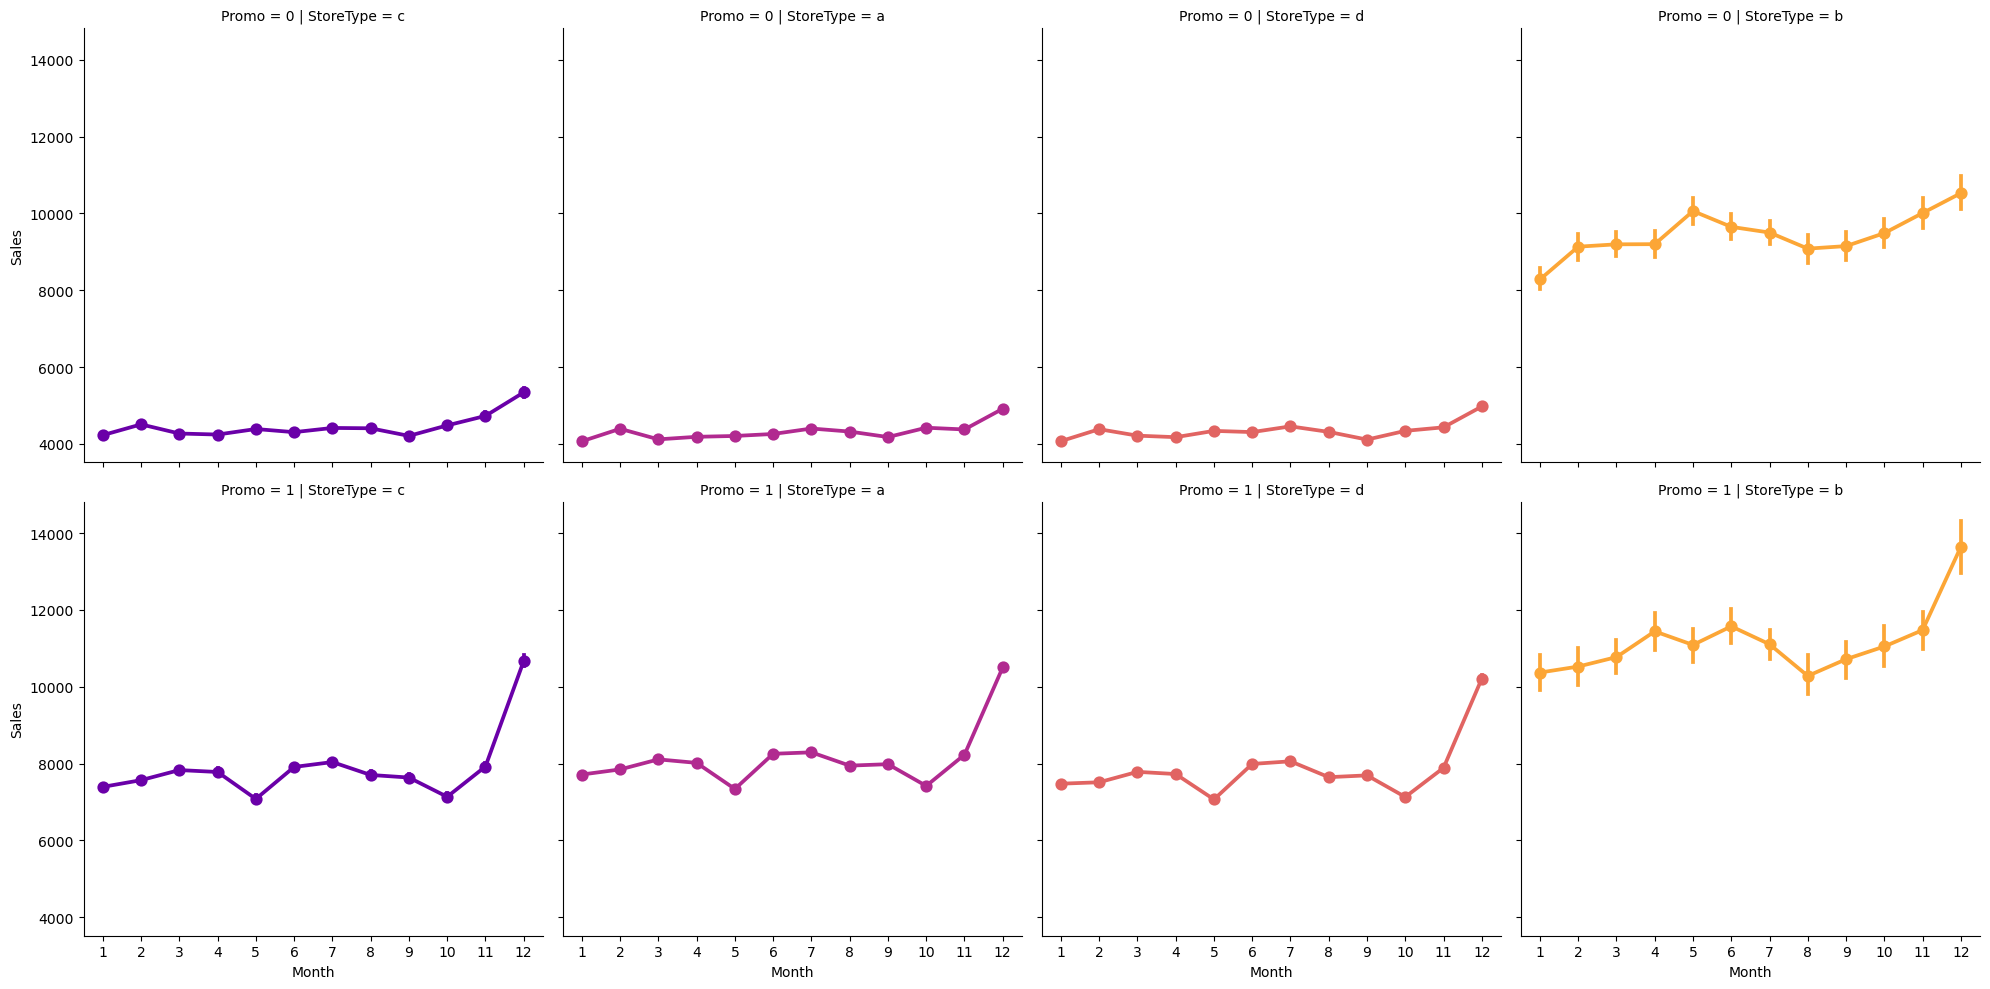

In [76]:
## sales trends
color = "red"
sns.catplot(data=train_store, x='Month', y="Sales",
            col='StoreType',  ## per store type in cols
            palette='plasma',
            hue='StoreType',
            row='Promo',  ## per promo in the store in rows
            kind='point',  ## use 'bar' for bar plots
            color=color)

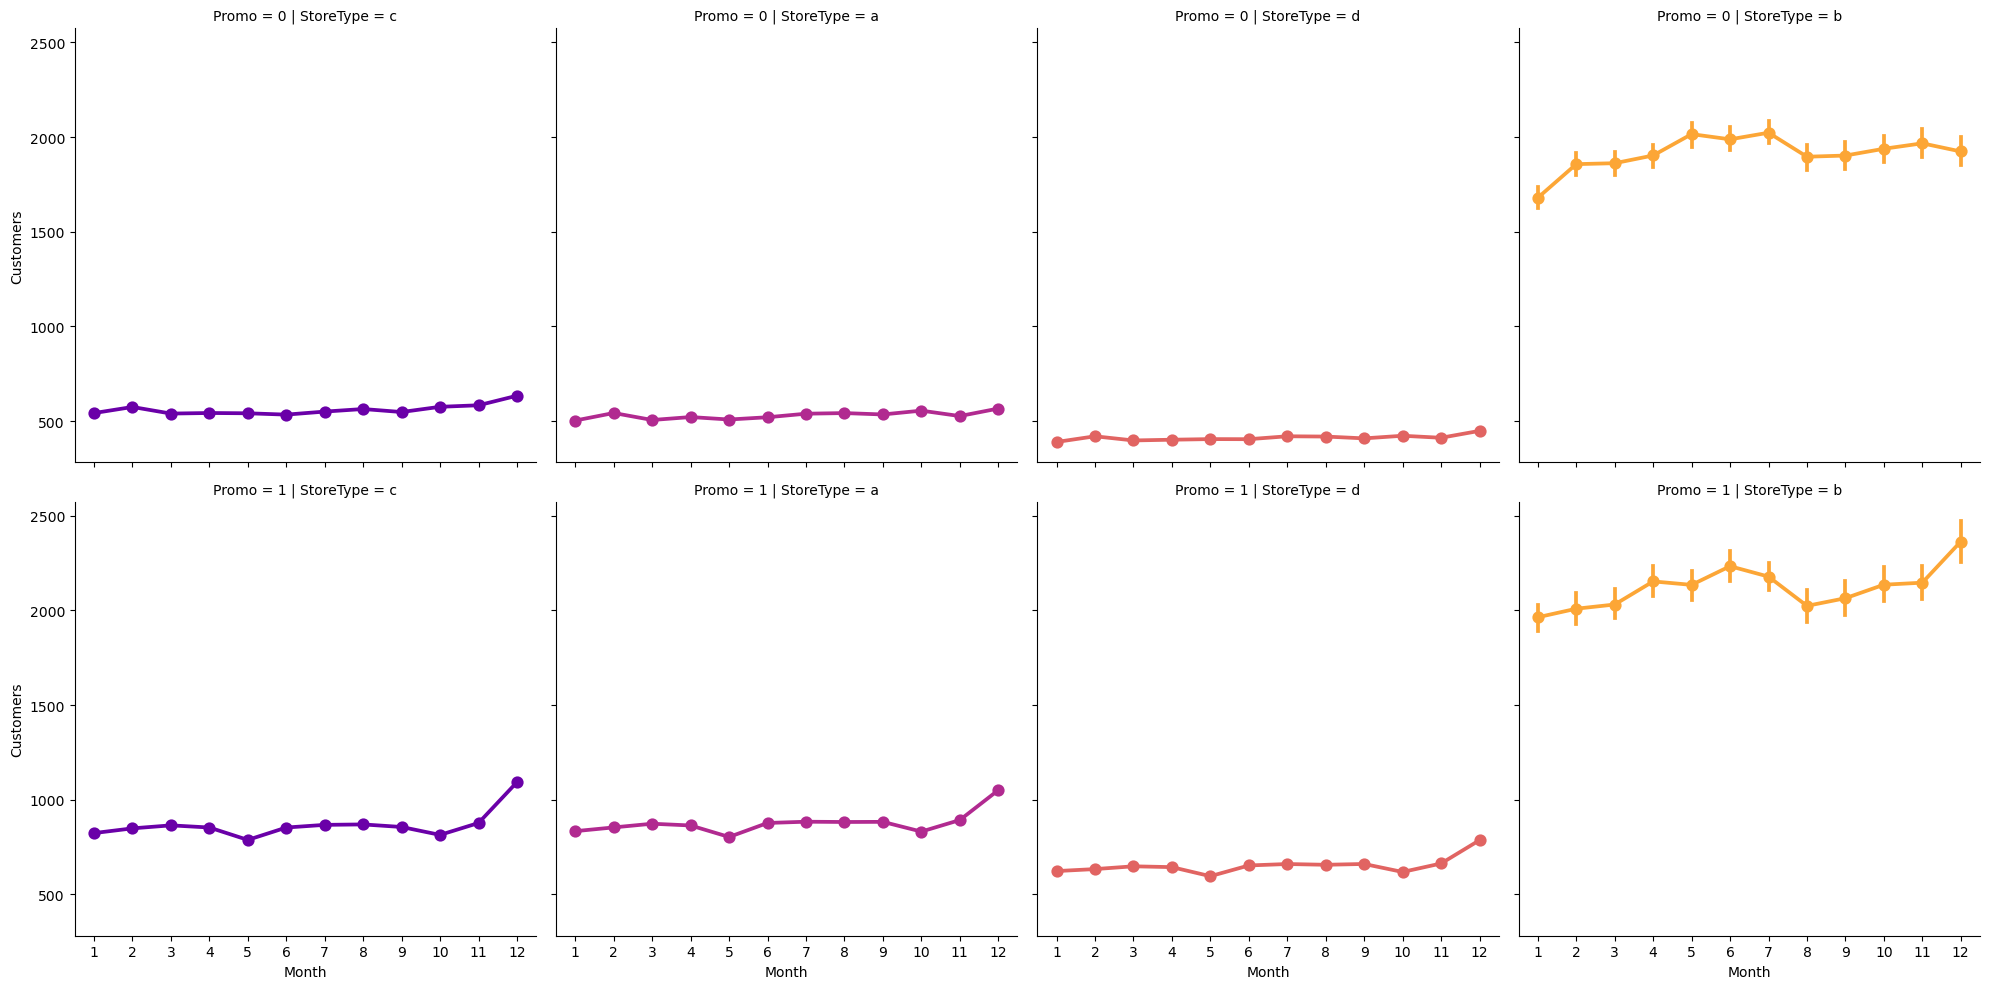

In [35]:
## Customer trends
c="blue"
sns.catplot(data = train_store, x = 'Month', y = "Customers", 
               col = 'StoreType', ## per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', ## per promo in the store in rows
               kind='point',  ## use 'bar' for bar plots
               color = c)

## Insights

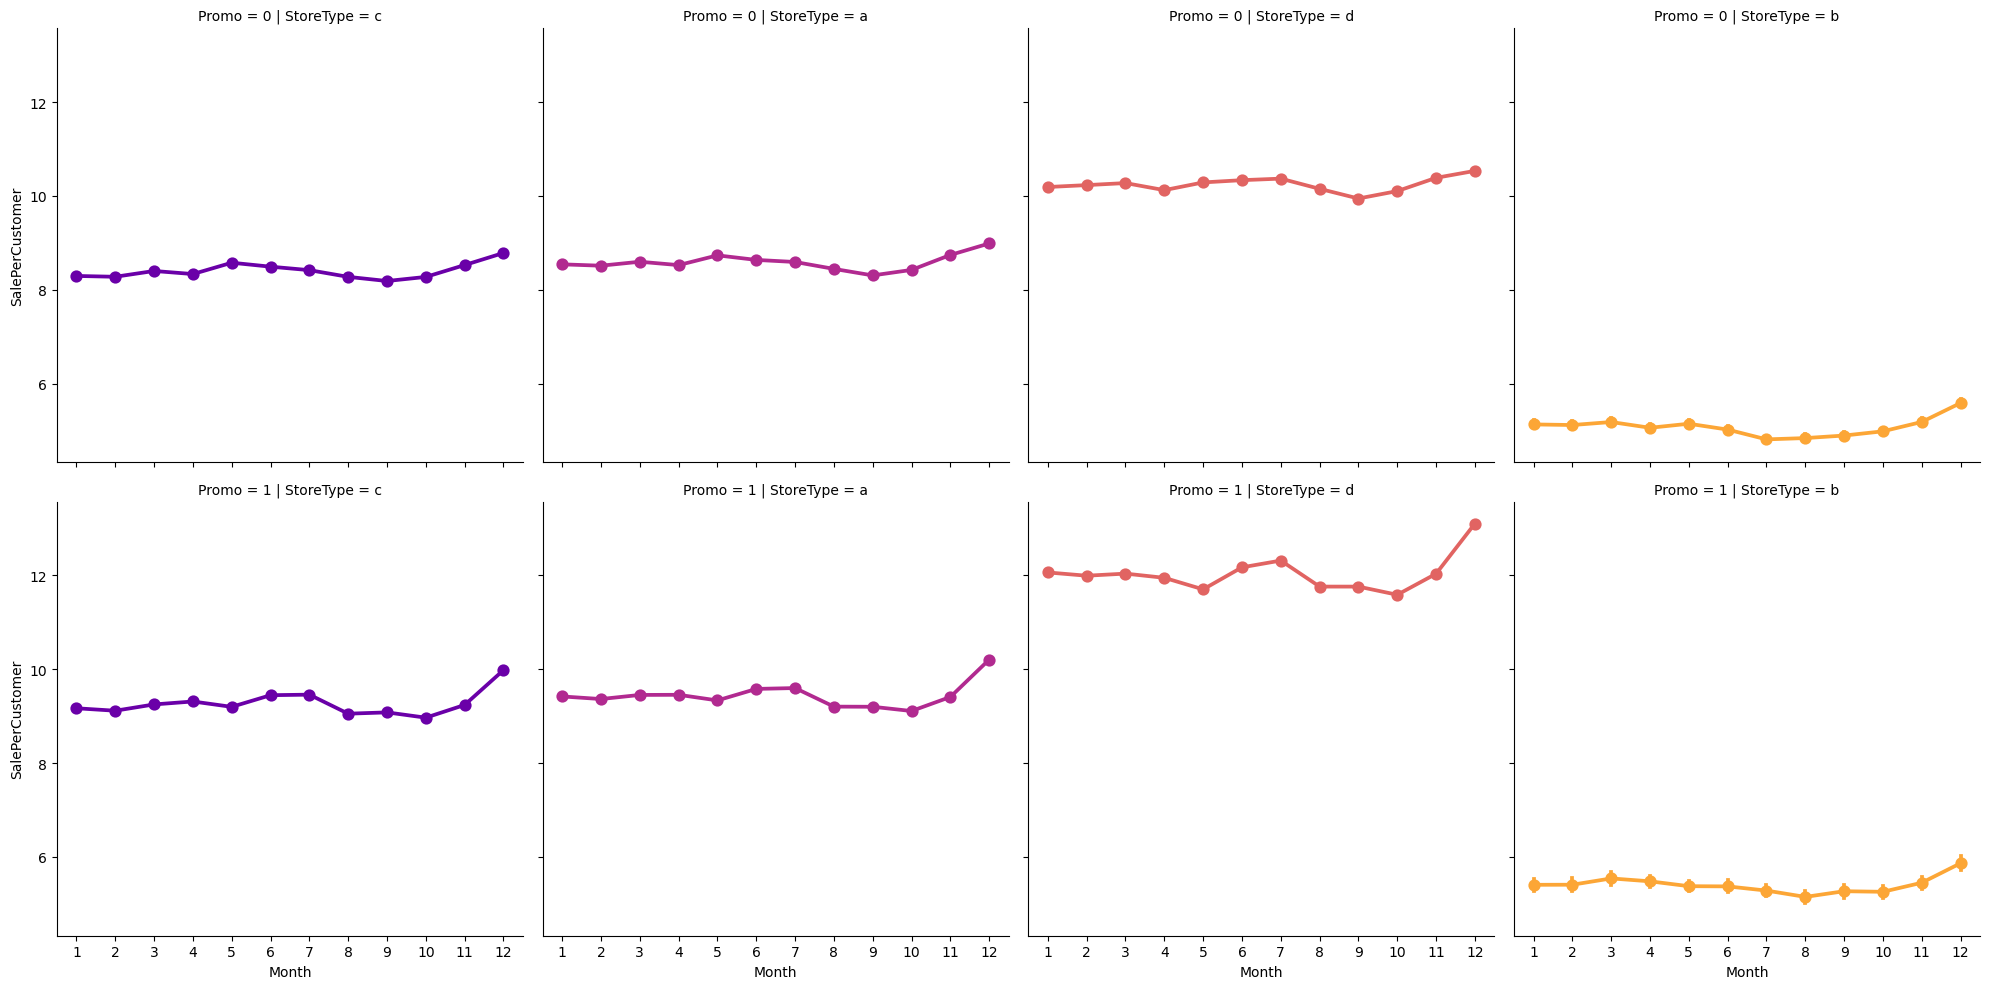

In [78]:
## sale per customer trends
c="green"
sns.catplot(data = train_store, x = 'Month', y = "SalePerCustomer", 
               col = 'StoreType', ## per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', ## per promo in the store in rows
               kind='point',  ## use 'bar' for bar plots
               color = c) 

***Eventhough the plots above showed StoreType B as the most selling and performant one, in reality it is not true. The highest SalePerCustomer amount is observed at the StoreType D, about $12 with Promo and $10 without. As for StoreType A and C it is about $9.***

***Low SalePerCustomer amount for StoreType B describes its Buyer Cart: there are a lot of people who shop essentially for "small" things (or in a little quantity). Plus we saw that overall this StoreType generated the least amount of sales and customers over the period.***

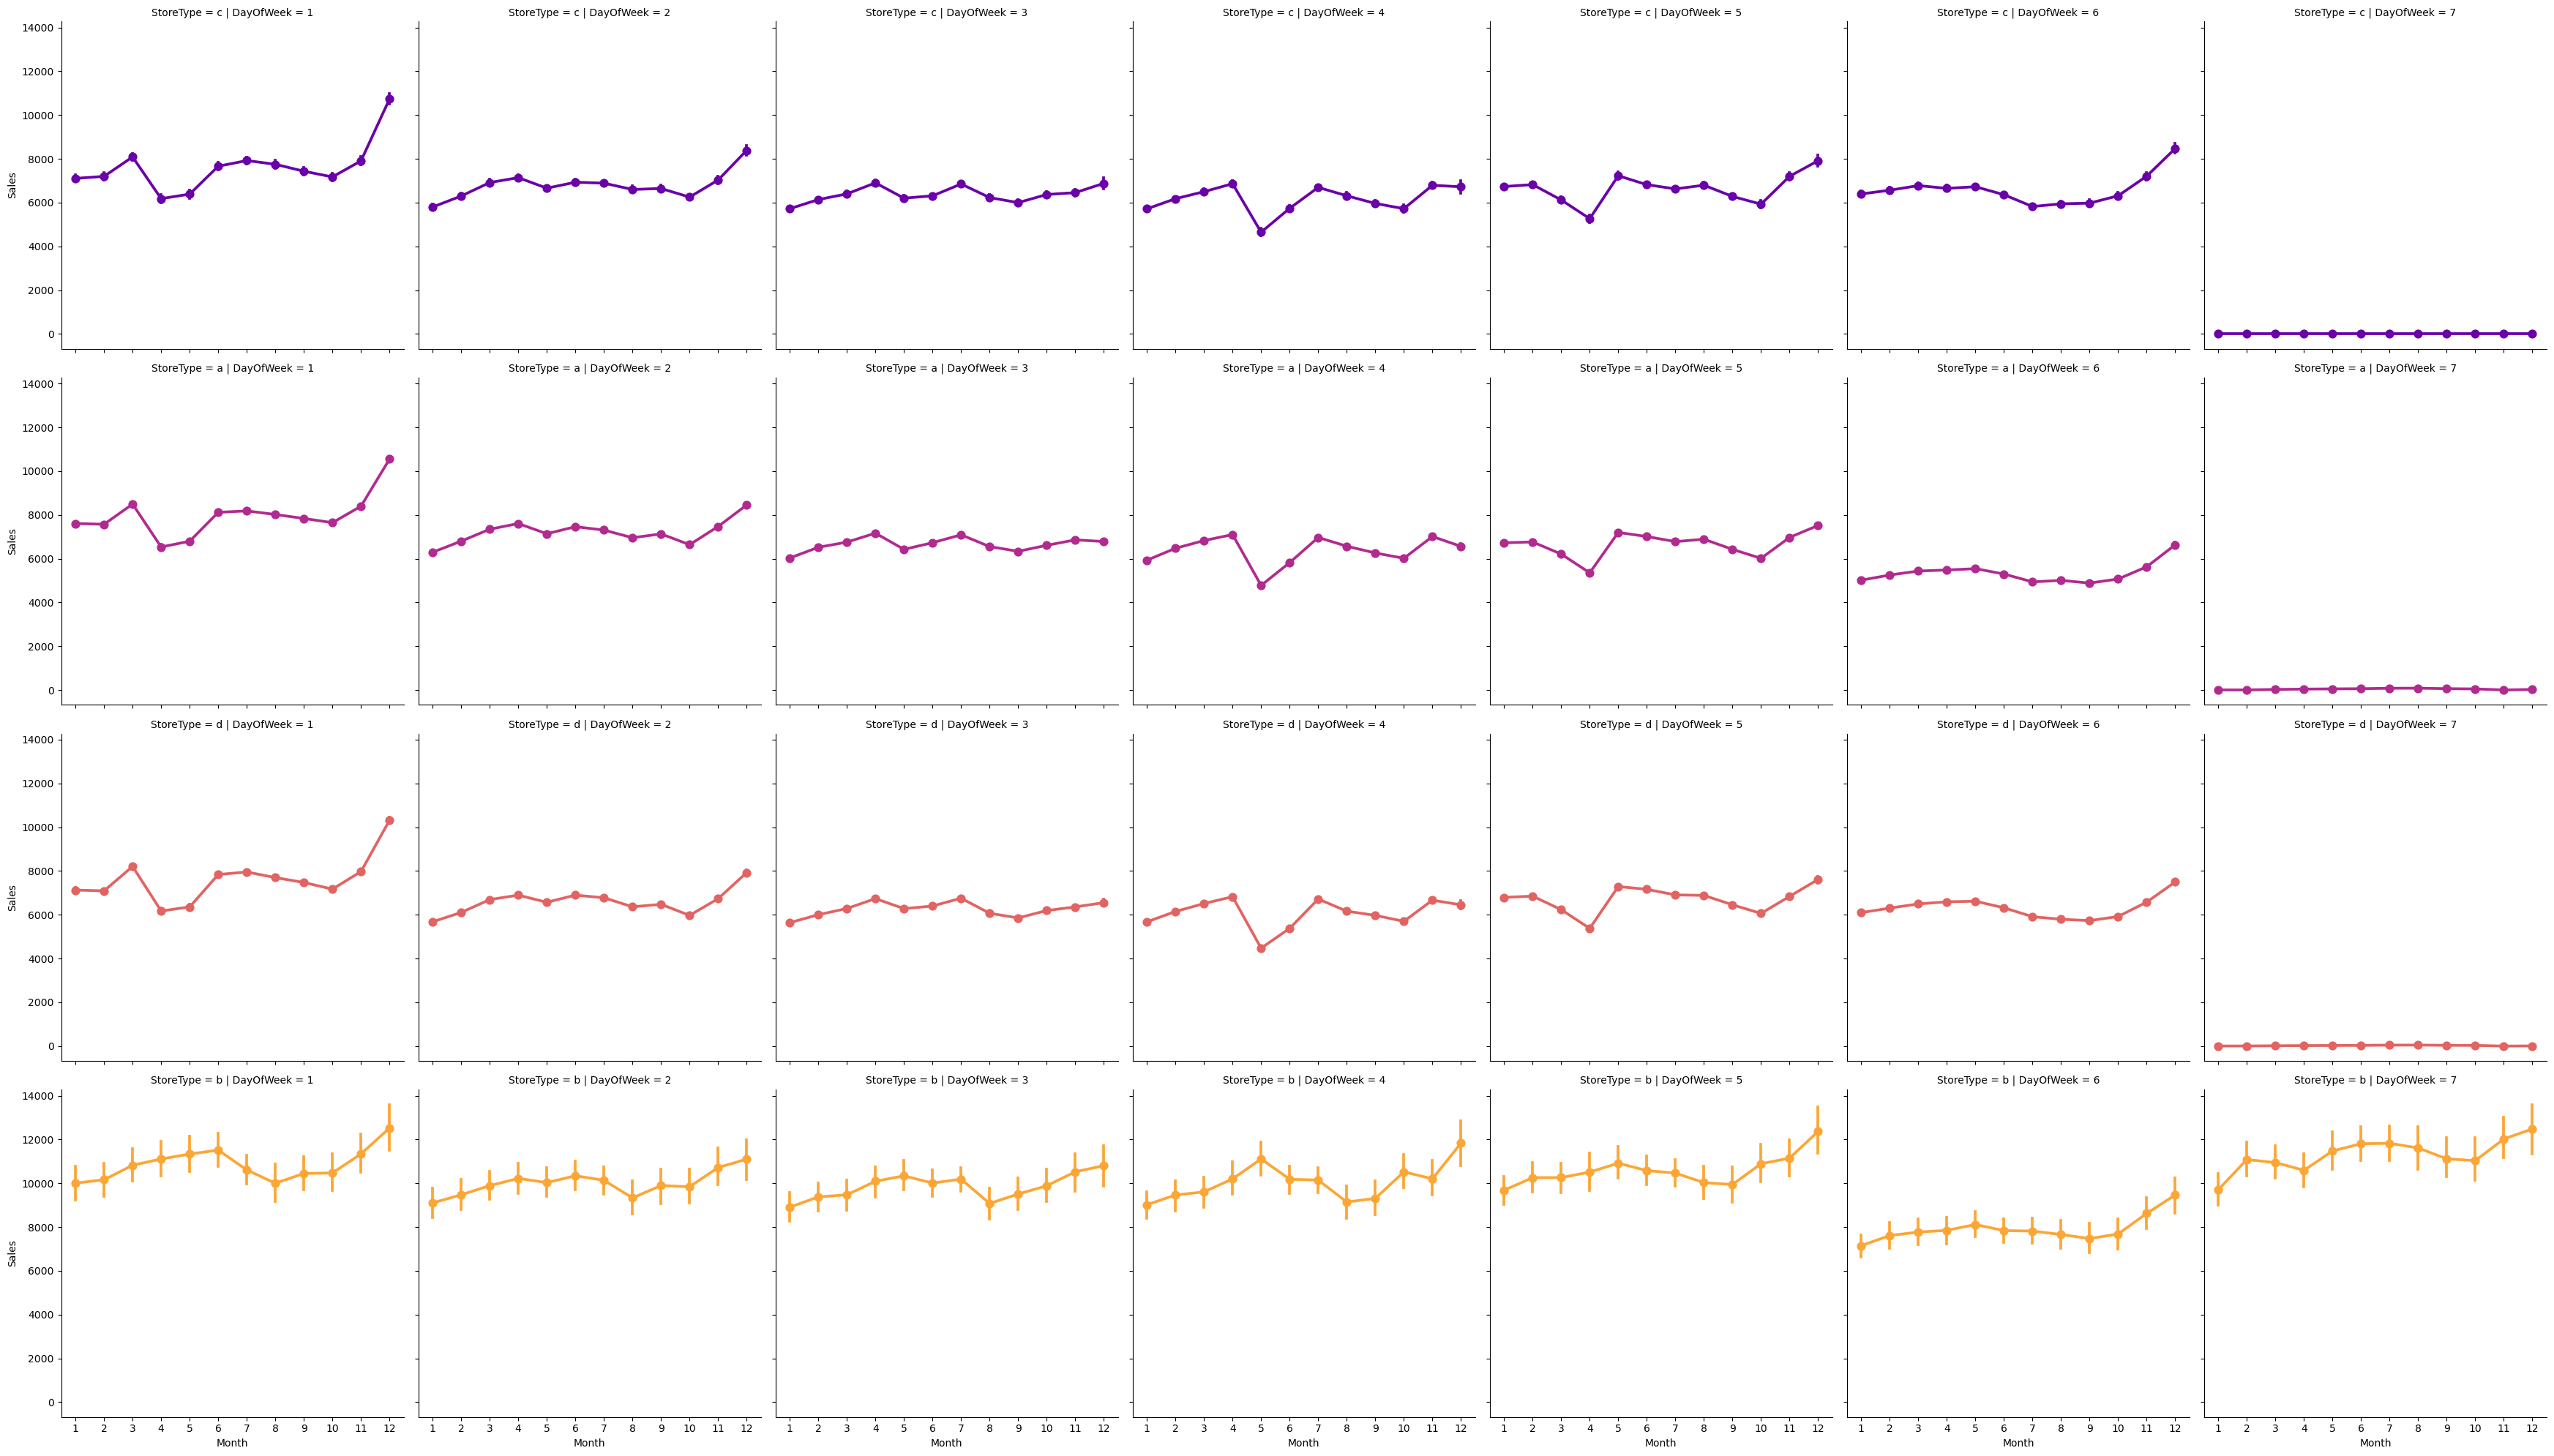

In [79]:
## customers
c="blue"
fig = sns.catplot(data = train_store, x = 'Month', y = "Sales", 
               col = 'DayOfWeek', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'StoreType', # per store type in rows
               kind='point',  ## use 'bar' for bar plots
               color = c)
fig.savefig('StoreType.jpeg')

__We see that stores of StoreType C are all closed on Sundays, whereas others are most of the time opened. Interestingly enough, stores of StoreType D are closed on Sundays only from October to December.But the way what are the stores which are opened on Sundays?__

In [80]:
## stores which are opened on Sundays
train_store[(train_store.Open == 1) & (train_store.DayOfWeek == 7)]['Store'].unique()

array([  85,  122,  209,  259,  262,  274,  299,  310,  335,  353,  423,
        433,  453,  494,  512,  524,  530,  562,  578,  676,  682,  732,
        733,  769,  863,  867,  877,  931,  948, 1045, 1081, 1097, 1099],
      dtype=int64)

***To complete our preliminary data analysis, we can add variables describing the period of time during which competition and promotion were opened:***

In [81]:
## competition open time (in months)
train_store['CompetitionOpen'] = 12 * (train_store.Year - train_store.CompetitionOpenSinceYear) + \
        (train_store.Month - train_store.CompetitionOpenSinceMonth)
    
## Promo open time
train_store['PromoOpen'] = 12 * (train_store.Year - train_store.Promo2SinceYear) + \
        (train_store.WeekOfYear - train_store.Promo2SinceWeek) / 4.0

## replace NA's by 0
train_store.fillna(0, inplace = True)

## average PromoOpen time and CompetitionOpen time per store type
train_store.loc[:, ['StoreType', 'Sales', 'Customers', 'PromoOpen', 'CompetitionOpen']].groupby('StoreType').mean().reset_index()

,StoreType,Sales,Customers,PromoOpen,CompetitionOpen
0,a,5738.179710,659.034880,12882.592255,7122.919204
1,b,10058.837334,1987.720846,17264.621605,11264.823310
2,c,5723.629246,673.265894,12128.625157,6737.717159
3,d,5641.819243,501.434892,10397.346995,9038.541369


__The most selling and crowded StoreType A doesn't appear to be the one the most exposed to competitors. Instead it's a StoreType B, which also has the longest running period of promotion.__

### Correlation Analysis
Adding new variables to the data is done, so now we can check the overall correlations by plotting the seaborn heatmap:

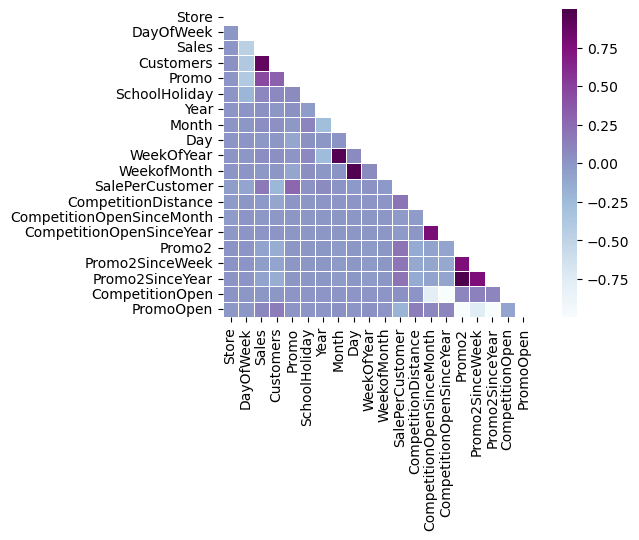

In [82]:
## Drop columns with non-numeric values
train_store_numeric = train_store.select_dtypes(include=[np.number])

## Compute the correlation matrix 
## Exclude 'Open' variable
corr_all = train_store_numeric.drop('Open', axis=1).corr()

## Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_all))

## Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 4))

## Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask=mask, square=True, linewidths=.5, ax=ax, cmap="BuPu")      
plt.show()

In [36]:
?

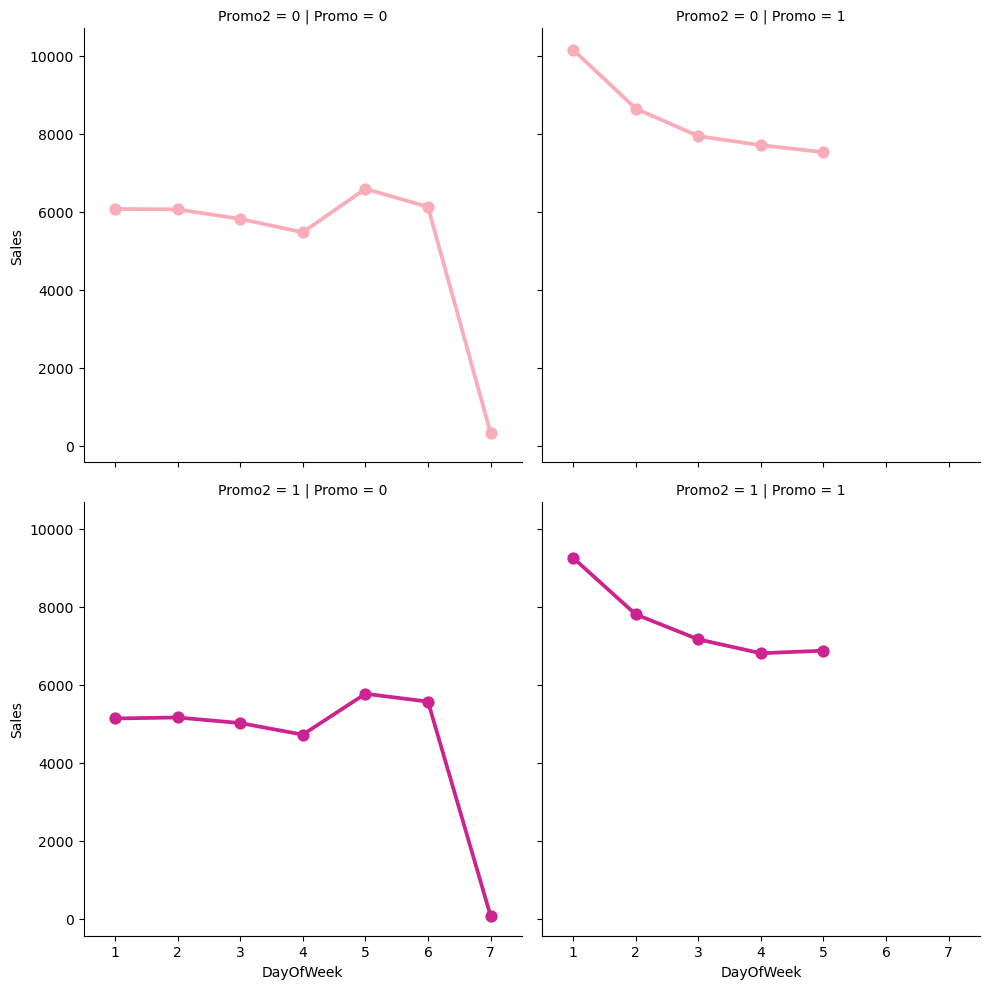

In [83]:
# sale per customer trends
sns.catplot(data = train_store, x = 'DayOfWeek', y = "Sales", 
               col = 'Promo', 
               row = 'Promo2',
               hue = 'Promo2',
               palette = 'RdPu',
               kind='point')  ## use 'bar' for bar plots
plt.show()

__There are several things we can conclude :__

1. In case of no promotion, both Promo and Promo2 are equal to 0, Sales tend to peak on Sunday (!). Though we should note that StoreType C doesn't work on Sundays. So it is mainly data from StoreType A, B and D.

2. On the contrary, stores that run the promotion tend to make most of the Sales on Monday. This fact could be a good indicator for Rossmann marketing campaigns. The same trend follow the stores which have both promotion at the same time (Promo and Promo2 are equal to 1).

3. Promo2 alone doesn't seem to be correlated to any significant change in the Sales amount. This can be also prooved by the blue pale area on the heatmap above.

# Task 1 - Exploration of customer purchasing behavior

# 1-  Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?


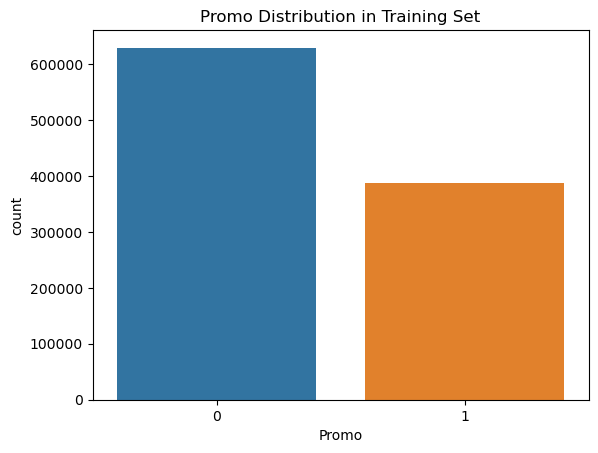

In [38]:
train_distribution = train_df['Promo'].value_counts()
sns.barplot(x=train_distribution.index, y=train_distribution)

#plt.ylabel("Promo")
plt.title("Promo Distribution in Training Set")
plt.show()

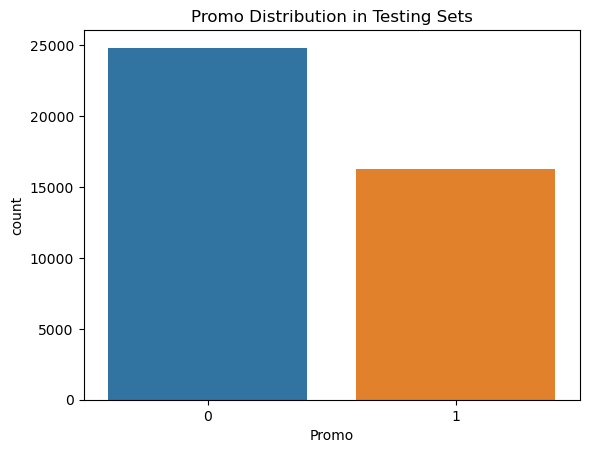

In [39]:
test_distribution = test_df['Promo'].value_counts()
sns.barplot(x=test_distribution.index, y=test_distribution)

#plt.ylabel("Promo")
plt.title("Promo Distribution in Testing Sets")
plt.show()

**Observation: The distributiuon of promo over on training set is greater than the promo distribution over test set**

# 2- Check & compare sales behavior before, during and after holidays





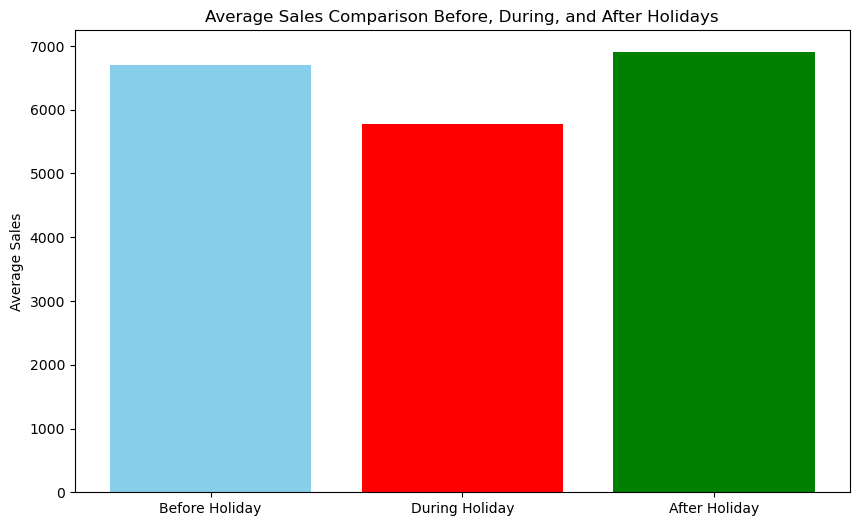

In [40]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
## Define the holiday calendar
holidays = calendar().holidays(start=train_store['Date'].min(), end=train_store['Date'].max())

## Find out if there is an increase in sales before or after holidays
## We will compare the average sales for the holiday, one week before, and one week after
holiday_sales = train_store[train_store['Date'].isin(holidays)]['Sales'].mean()
before_holiday_sales = train_store[train_store['Date'].isin(holidays - pd.Timedelta(days=7))]['Sales'].mean()
after_holiday_sales = train_store[train_store['Date'].isin(holidays + pd.Timedelta(days=7))]['Sales'].mean()

## Plot the results
plt.figure(figsize=(10, 6))
plt.bar(['Before Holiday', 'During Holiday', 'After Holiday'], 
        [before_holiday_sales, holiday_sales, after_holiday_sales], color=['skyblue', 'red', 'green'])
plt.ylabel('Average Sales')
plt.title('Average Sales Comparison Before, During, and After Holidays')
plt.show()

**Observation: there are more sales before and after the Holidays when it compared to holidays sales**

# 3-Find out any seasonal (Christmas, Easter etc) purchase behaviours

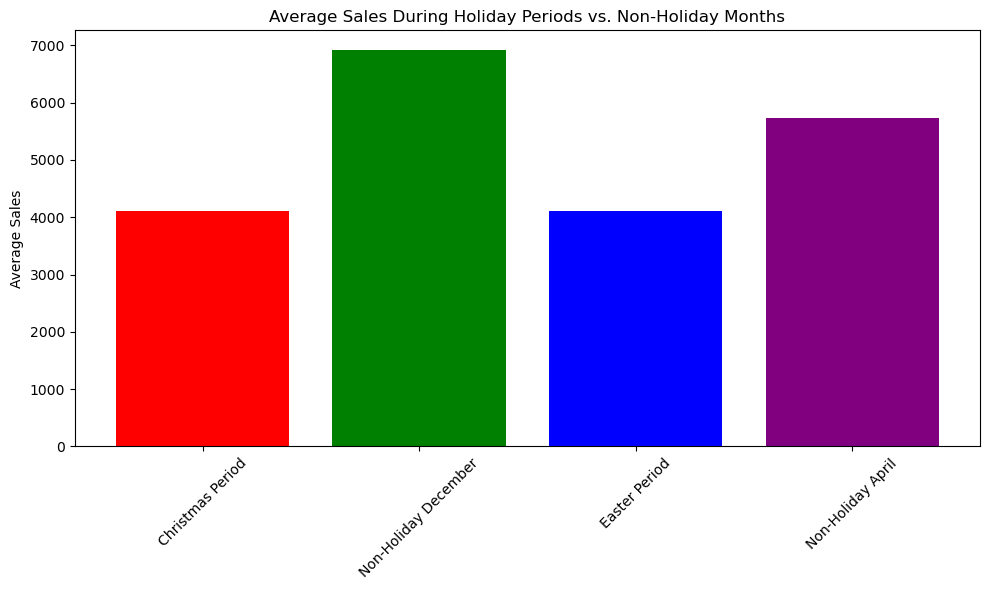

In [41]:
from pandas.tseries.holiday import Holiday

# Convert 'Date' to datetime and sort the dataframe by date
train_store['Date'] = pd.to_datetime(train_store['Date'])
train_store.sort_values('Date', inplace=True)

# Define major holidays in Germany
christmas = pd.to_datetime(['2013-12-24', '2014-12-24', '2015-12-24'])  # Christmas Eve
christmas_period = pd.date_range(start='12/15/2013', end='12/30/2015', freq='A')
easter = pd.to_datetime(['2013-03-31', '2014-04-20', '2015-04-05'])  # Easter Sunday
easter_period = pd.date_range(start='03/25/2013', end='04/10/2015', freq='A')

# Create masks for the holiday periods
christmas_mask = train_store['Date'].isin(christmas_period)
easter_mask = train_store['Date'].isin(easter_period)

# Calculate average sales during Christmas and Easter periods
christmas_sales = train_store.loc[christmas_mask, 'Sales'].mean()
easter_sales = train_store.loc[easter_mask, 'Sales'].mean()

# Calculate average sales for the same periods in non-holiday years
non_holiday_christmas_sales = train_store[(~train_store['Date'].isin(christmas_period)) & (train_store['Date'].dt.month == 12)]['Sales'].mean()
non_holiday_easter_sales = train_store[(~train_store['Date'].isin(easter_period)) & (train_store['Date'].dt.month == 4)]['Sales'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(['Christmas Period', 'Non-Holiday December', 'Easter Period', 'Non-Holiday April'], 
        [christmas_sales, non_holiday_christmas_sales, easter_sales, non_holiday_easter_sales], 
        color=['red', 'green', 'blue', 'purple'])
plt.ylabel('Average Sales')
plt.title('Average Sales During Holiday Periods vs. Non-Holiday Months')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('seasonal_sales_comparison.png')
plt.show()

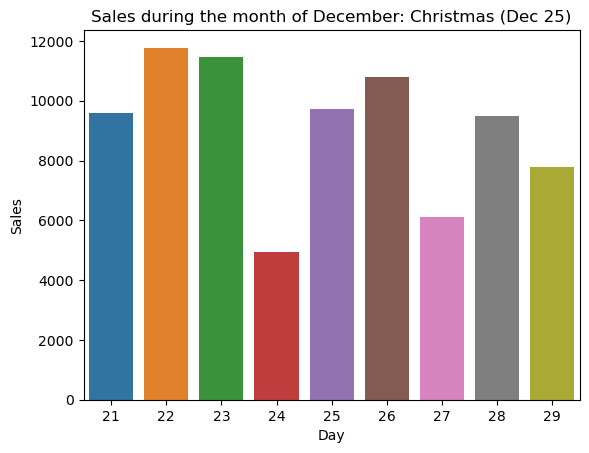

In [42]:
## Filter the open stores in 2014
open_store = train_store[(train_store.Open == 1) & (train_store.Year == 2014)]

## Set the month of Christmas
christmas_month = 12

## Filter the data for the Christmas month
christmas_data = open_store[open_store.Month == christmas_month]

## Filter the data for the days around Christmas
around_christmas = christmas_data[(christmas_data['Day'] > 20) & (christmas_data['Day'] < 30)]

## Calculate the average sales for each day around Christmas
average_sales = around_christmas[['Day', 'Sales']].groupby('Day').mean()

## Plot the average sales for each day around Christmas
sns.barplot(x=average_sales.index, y=average_sales['Sales'])

## Set the title of the plot
plt.title('Sales during the month of December: Christmas (Dec 25)')

## Display the plot
plt.show()

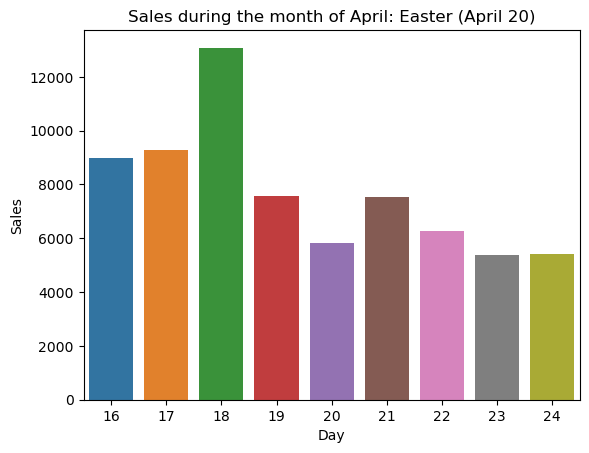

In [43]:
## Filter the data for open stores in 2014
open_store = train_store[(train_store.Open == 1) & (train_store.Year == 2014)]

## Specify the month for Easter
easter_month = 4

## Filter the data for the specified Easter month
easter_data = open_store[open_store.Month == easter_month]

## Filter the data for the days around Easter
around_easter = easter_data[(easter_data['Day'] > 15) & (easter_data['Day'] < 25)]

## Calculate the average sales for each day around Easter
average_sales = around_easter[['Day', 'Sales']].groupby('Day').mean()

## Plot the average sales for each day around Easter
sns.barplot(x=average_sales.index, y=average_sales['Sales'])

## Set the title for the plot
plt.title('Sales during the month of April: Easter (April 20)')

## Display the plot
plt.show()

**Observation: As we can observ in above barplots that sales are higher during Non-Holiday month of April and December period when it campared to Holiday Christmas period and Holiday Easter Period**

# 4- What can you say about the correlation between sales and number of customers?

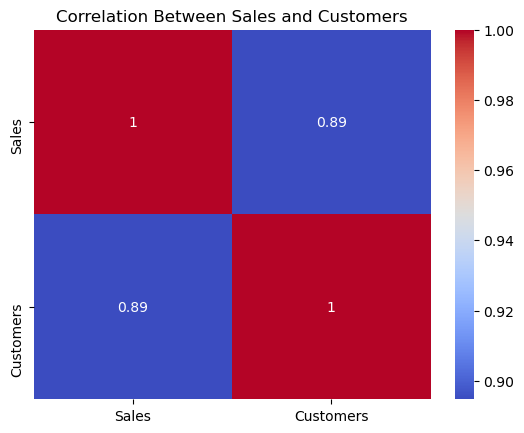

In [44]:
sns.heatmap(train_store[['Sales', 'Customers']].corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Between Sales and Customers')
plt.show()

__Observation : the more customers the more sales. because there is a high correlation between Sales and Customers.__

In [45]:
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
scaler = MinMaxScaler()

sales_customers_df = pd.DataFrame()
sales_customers_df['Sales'] = train_store['Sales']
sales_customers_df['Customers'] = train_store['Customers']
try:
    sales_customers_df = scaler.fit_transform(sales_customers_df)
    sales_customers_df = DataFrame(sales_customers_df)
    logging.info(f"Dataset Normalizing successfully")
except Exception as e:
    logging.debug(f"Exception occured in Normalizing the dataset, {e}")

sales_customers_df['days'] = train_store['Day']
sales_customers_df['Sales'] = sales_customers_df[0]
sales_customers_df['Customers'] = sales_customers_df[1]
try:

    sales_customers_df = sales_customers_df.drop(columns=[0,1])
    logging.info(f"Dropping some columns in dataset successfully")
    
except Exception as e:
    logging.debug(f"Exception occured in dropping some columns in dataset, {e}")

sales_customers_df.sample(3)

INFO:root:Dataset Normalizing successfully
INFO:root:Dropping some columns in dataset successfully


,days,Sales,Customers
538124,25,0.259224,0.135625
1016226,10,0.208539,0.131159
606630,17,0.000000,0.000000


<Axes: >

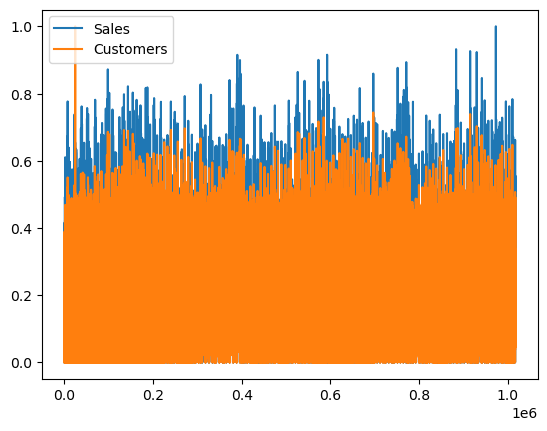

In [46]:
sales_customers_df =sales_customers_df[['Sales','Customers']]
sales_customers_df.plot(kind='line')

**Observation: Sales and Number of Customers are directly proportional as seen in the figure above**

# 5- How does promo affect sales? Are the promos attracting more customers How ?

<Figure size 1200x700 with 0 Axes>

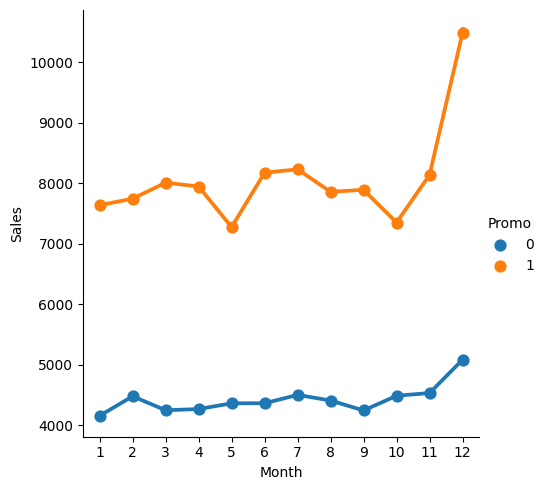

In [50]:
plt.figure(figsize=(12,7))
sns.catplot(data = train_store, x ="Month", y = "Sales",
               hue = 'Promo',
              sharex=False,
              kind='point')  ## use 'bar' for bar plots)
plt.show()

**Observation: From the above plots it can be seen that there is a significant increase in average sales when there is promotion. The promotion had huge impact during the month of December.**

<Figure size 1200x700 with 0 Axes>

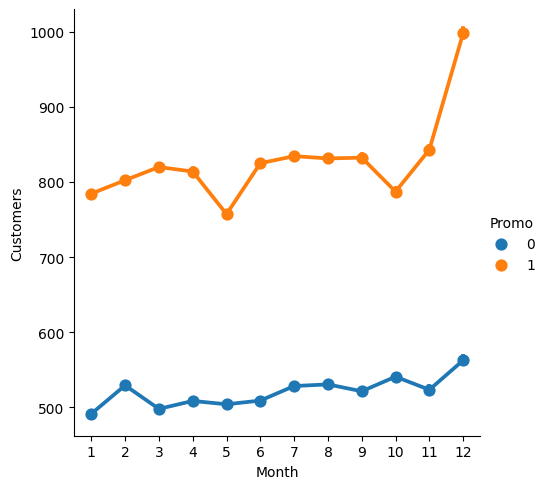

In [51]:
plt.figure(figsize=(12,7))
sns.catplot(data = train_store, x ="Month", y = "Customers",
               hue = 'Promo',
              sharex=False,
              kind='point')  ## use 'bar' for bar plots))
plt.show()

**Observation: As shown in the above figure, promotion directly impacts the number of Customers**

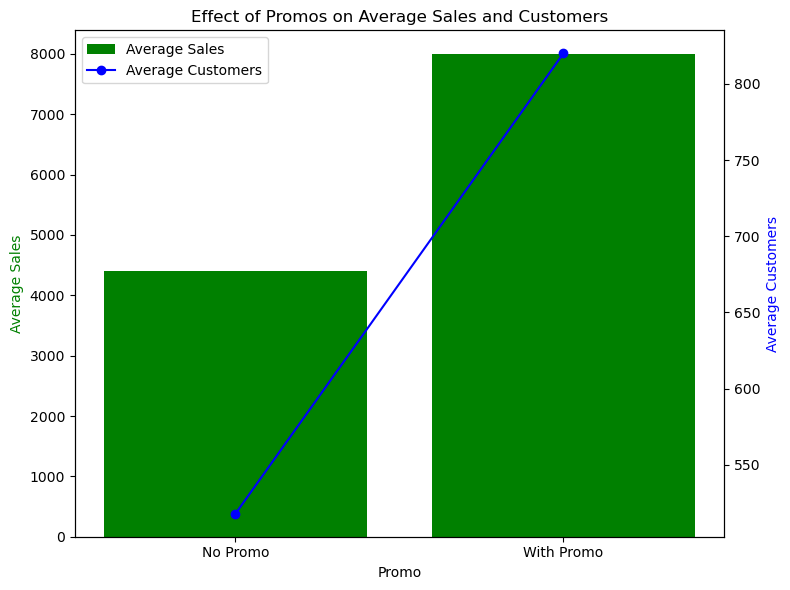

In [47]:
## Group data by 'Promo' and calculate average sales and customer counts
promo_grouped = train_store.groupby('Promo')[['Sales', 'Customers']].mean()

## Plot the results
fig, ax1 = plt.subplots(figsize=(8, 6))

ax2 = ax1.twinx()
ax1.bar(promo_grouped.index, promo_grouped['Sales'], color='g', label='Average Sales')
ax2.plot(promo_grouped.index, promo_grouped['Customers'], color='b', label='Average Customers', marker='o')

ax1.set_xlabel('Promo')
ax1.set_ylabel('Average Sales', color='g')
ax2.set_ylabel('Average Customers', color='b')

## Title and labels
plt.title('Effect of Promos on Average Sales and Customers')
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['No Promo', 'With Promo'])

## Legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.savefig('promo_effect.png')
plt.show()

**The above plot displays the average sales and customer counts in relation to promotional days. It shows a clear increase in both sales and customer traffic on days when promotions are active.**

# 6-Could the promos be deployed in more effective ways? Which stores should promos be deployed in?


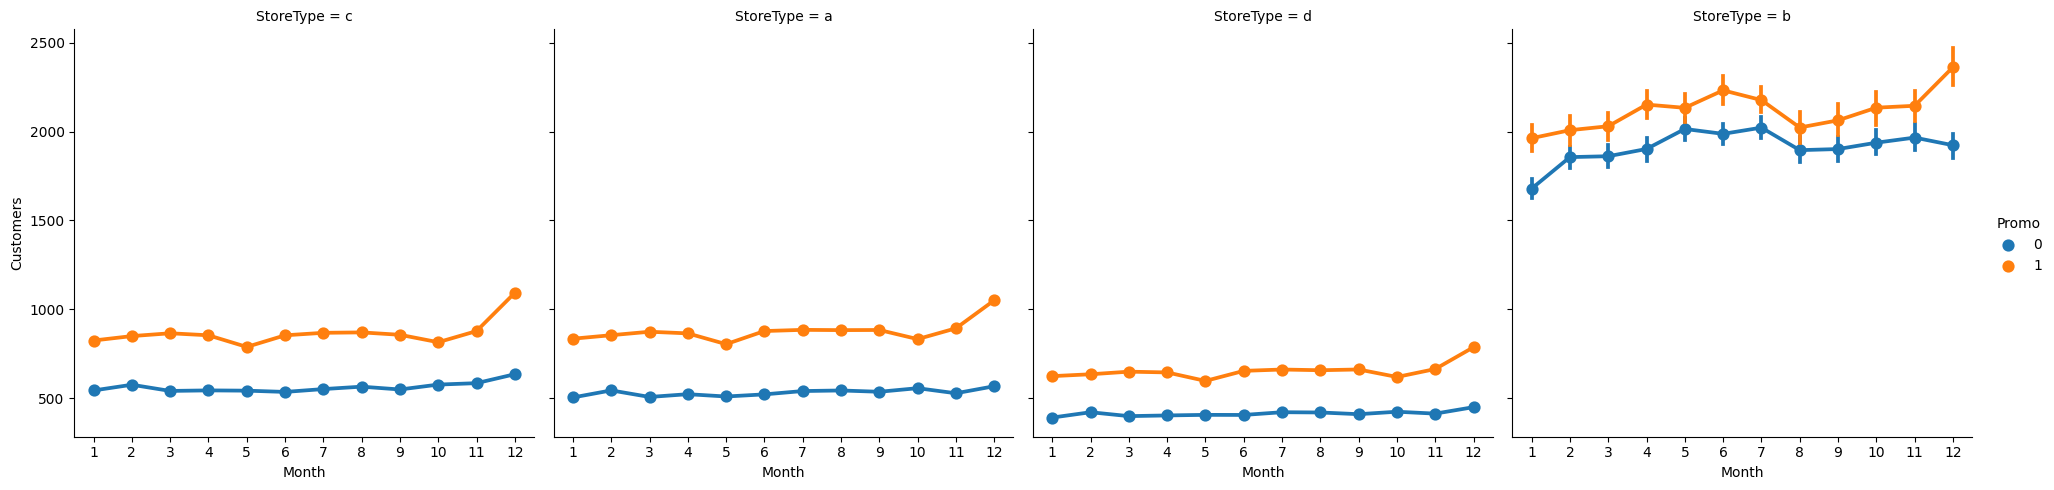

In [52]:
ax = sns.catplot(data = train_store, x ="Month", y = "Customers", 
               col = 'StoreType',
               hue = 'Promo',
               sharey=True,
               sharex=True,
               kind='point')

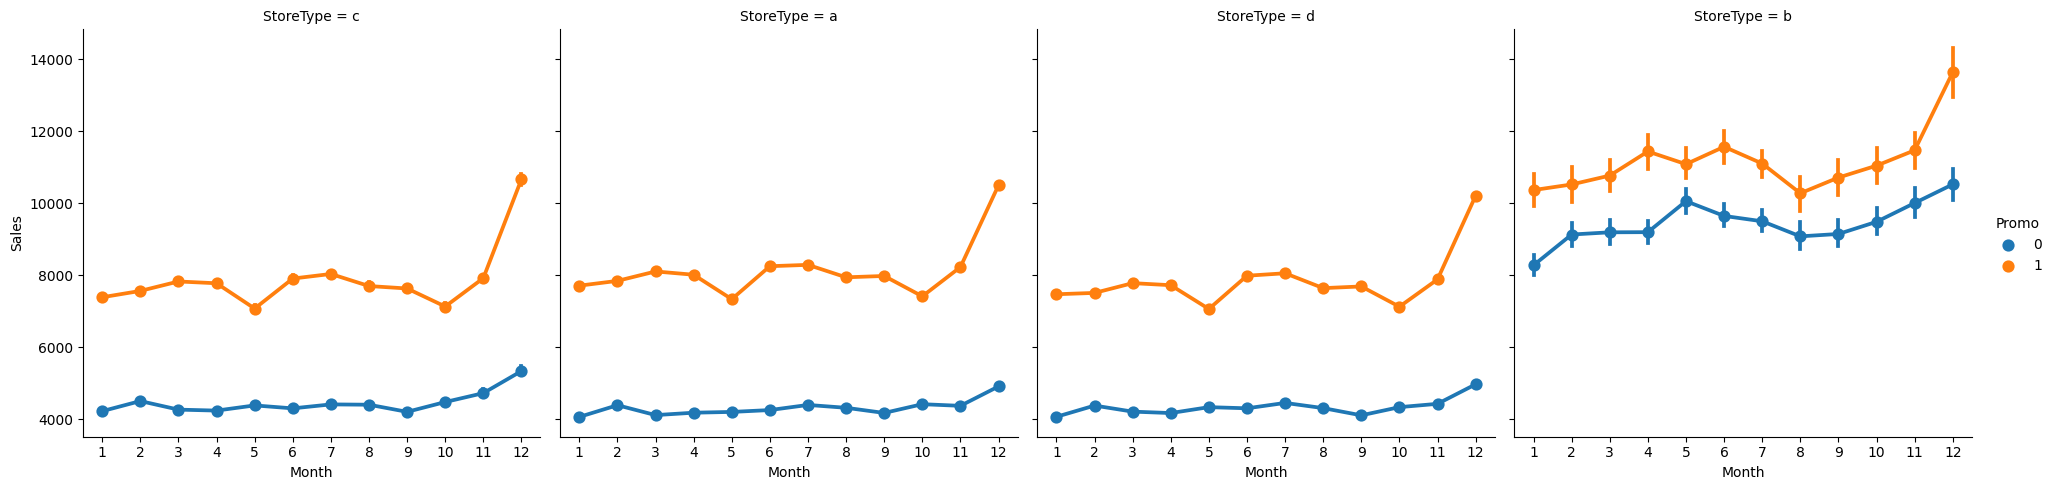

In [53]:
ax = sns.catplot(data = train_store, x ="Month", y = "Sales", 
               col = 'StoreType',
               hue = 'Promo',
               sharey=True,
               sharex=True,
               kind='point')

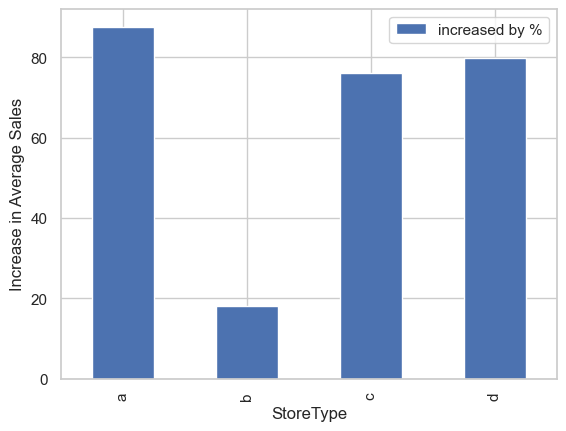

In [99]:
sales_by_promo = train_store.groupby(["StoreType","Promo"]).agg({"Sales":"mean"})
# a.plot(kind='bar')

sales_by_promo = sales_by_promo.reset_index()
sales_by_promo["increased by %"]=sales_by_promo.groupby(sales_by_promo.index//2)['Sales'].diff(1)

sales_by_promo.fillna(method="bfill",inplace=True)
sales_by_promo.drop(index=sales_by_promo[sales_by_promo["Promo"]==1].index,inplace=True)
sales_by_promo.drop(columns="Promo",inplace=True)
sales_by_promo["increased by %"]=np.round(sales_by_promo["increased by %"]*100/sales_by_promo["Sales"],2)
sales_by_promo.drop(columns=["Sales"],inplace=True)
sales_by_promo.index=sales_by_promo["StoreType"]
sales_by_promo.drop(columns="StoreType",inplace=True)


sales_by_promo.plot(kind='bar')
plt.ylabel('Increase in Average Sales')
plt.show()

**Observation: We have a more similar trends regarding the three stores namely 'a', 'd', and 'c'
However Promotion seems to have a bigger impact in StoreType 'a'. We can see there is more than 80% growth in sales due to promotion.**

# 7- Trends of customer behavior during store open and closing times ?

<Axes: xlabel='DayOfWeek', ylabel='Customers'>

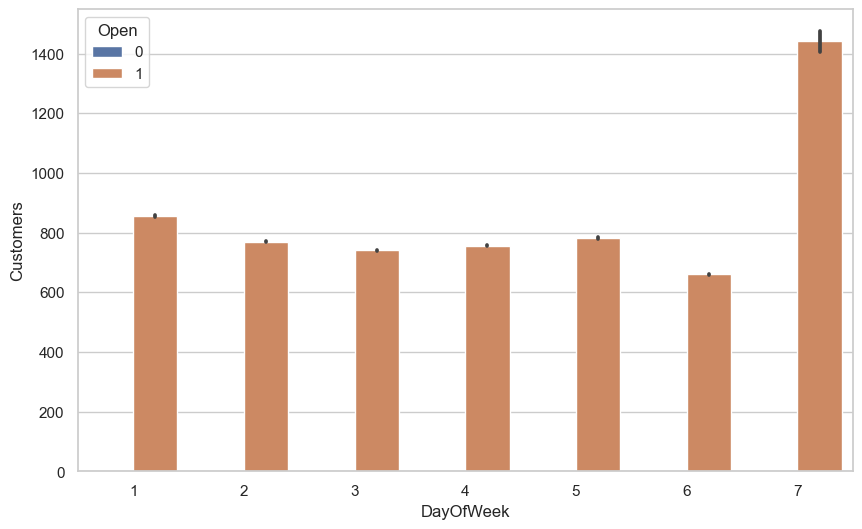

In [97]:
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.barplot(x='DayOfWeek',y='Customers',hue='Open', data=train_store)

<Figure size 1200x700 with 0 Axes>

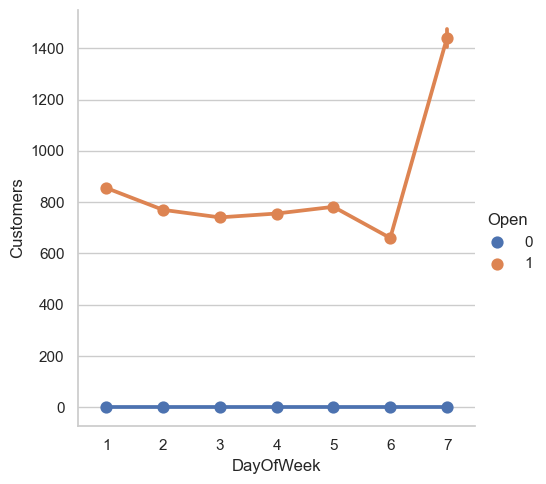

In [98]:
plt.figure(figsize=(12,7))
sns.catplot(data = train_store, x ="DayOfWeek", y = "Customers",
               hue = 'Open',
              sharex=False,
              kind='point')
plt.show()

# 8- Which stores are opened on all weekdays? How does that affect their sales on weekends ? 


In [94]:
def store_days_open(dataset, storeType=['a','b','c']):
    for store in storeType:
        try:

            days = dataset[dataset.Open == True][dataset.StoreType == store].DayOfWeek.unique()
            print(f" For StoreType: {store}, the Days of the week that is Open are: {days}")
            logging.info(f"Getting days of the week where by the store are open, successfully")
            
        except Exception as e:
            logging.debug(f"Exception occured in getting days in which stores are open, {e}")

In [95]:
storeTypes_list = ['a','b', 'c','d']
store_days_open(train_store, storeTypes_list)

INFO:root:Getting days of the week where by the store are open, successfully


 For StoreType: a, the Days of the week that is Open are: [5 4 3 2 1 6 7]


INFO:root:Getting days of the week where by the store are open, successfully


 For StoreType: b, the Days of the week that is Open are: [5 4 3 2 1 7 6]


INFO:root:Getting days of the week where by the store are open, successfully


 For StoreType: c, the Days of the week that is Open are: [5 4 3 2 1 6]


INFO:root:Getting days of the week where by the store are open, successfully


 For StoreType: d, the Days of the week that is Open are: [5 4 3 2 1 6 7]


**Observation: Store Type 'a, b, and d' are open throught the week (weekdays and weekends), while Store Type 'c' is closed on Sunday**

#### Store Type Sales with respect to Days of the week

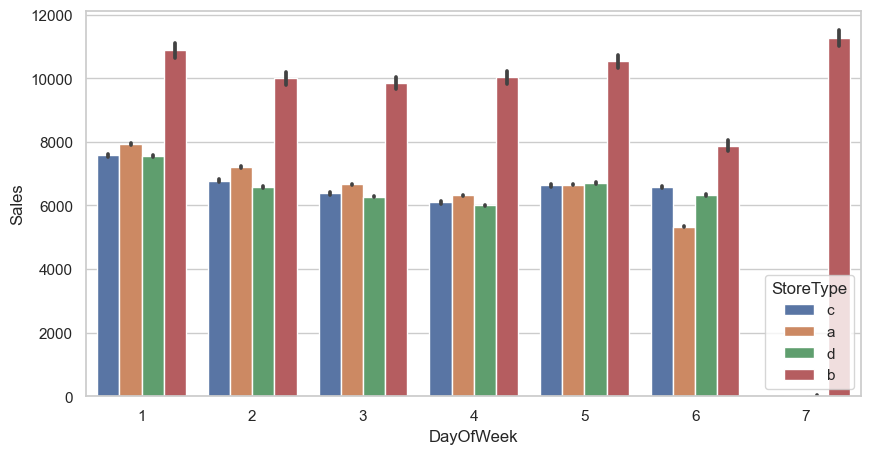

In [92]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.barplot(x='DayOfWeek',y='Sales',hue='StoreType',data=train_store)
plt.show()

**Store Types 'a' is Open on all days of the week, and has least sales on Saturday, and almost no sales on sunday**

**Store Type 'b' is open on all days of the week, and has almost constant sales during weekdays and less sales on saturday, and highest sales on Sunday.**

**Store Type 'c' is open from Monday to Saturday, with sales almost constant and on Sunday is closed.**

**Store Type 'd' is open open on all days of the week, and has almost no sales on sunday.**

# 9- Check how the assortment type affects sales ?

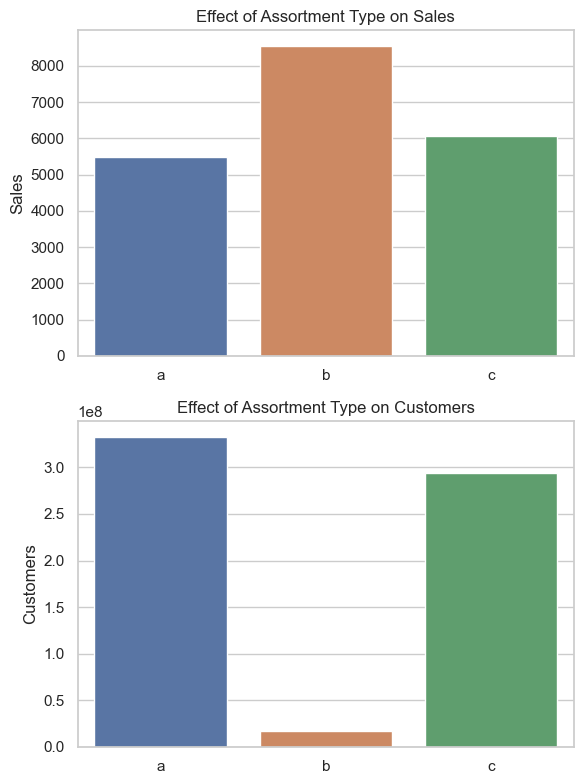

,Assortment,Sales,Customers
0,a,5481.026096,332766938
1,b,8553.931999,16972525
2,c,6058.676567,294302292


In [91]:
assortment = train_store.groupby('Assortment').agg({'Sales':'mean','Customers':'sum'}).reset_index()
assort_values = [x for x in assortment.Assortment]

fig, axes = plt.subplots(2, 1, figsize=(6, 8))

sns.barplot(x=assort_values, y=assortment.Sales, ax=axes[0])
axes[0].set_title('Effect of Assortment Type on Sales')

sns.barplot(x=assort_values, y=assortment.Customers, ax=axes[1])
axes[1].set_title('Effect of Assortment Type on Customers')

plt.tight_layout()
plt.show()
assortment

**Observation:The stores with extra assortment type have high mean sales and lowest customer numbers.**

Unique Assortment Types: ['a' 'c' 'b']


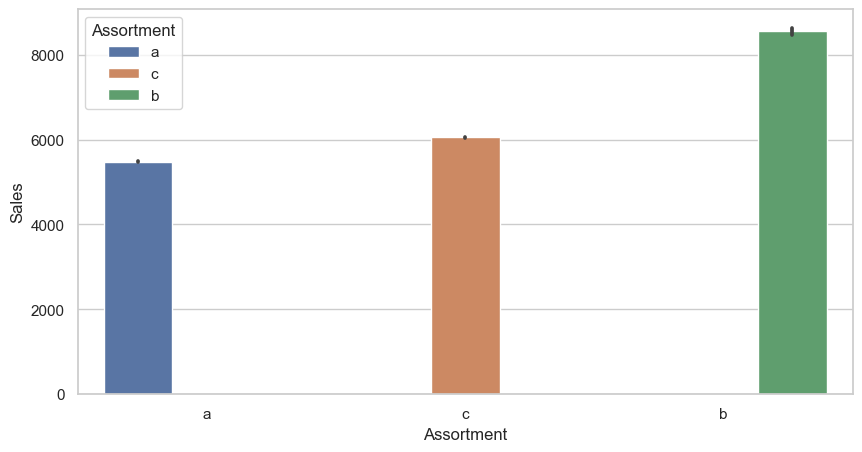

In [90]:
# Explore unique values in the 'Assortment' column
print("Unique Assortment Types:", train_store['Assortment'].unique())

# Group data by assortment type and calculate mean sales for each group
assortment_sales = train_store.groupby('Assortment')['Sales'].mean().sort_values()

# # Plot the results
# assortment_sales.plot(kind='bar', color='skyblue', edgecolor='black')
# plt.title('Average Sales by Assortment Type')
# plt.xlabel('Assortment Type')
# plt.ylabel('Average Sales')
# plt.show()
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.barplot(x='Assortment',y='Sales',hue='Assortment',data=train_store)
plt.show()

**Observation: Sales is Highest in Extra assortment type followed by Extended type.**

# 10- How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case ?


In [56]:
# Statistical Description of CompetitionDistance
round(train_store.CompetitionDistance.describe(),2)

count    1017209.00
mean        5422.02
std         7706.92
min           20.00
25%          710.00
50%         2325.00
75%         6880.00
max        75860.00
Name: CompetitionDistance, dtype: float64

**The minimum, average, and Max. Distance to the Competitor store are 20, 5422 and 75860 distance units respectivelly.**

In [89]:
sales = train_store[train_store.CompetitionDistance <= 710.00].Sales.sum()
sales1 = train_store[train_store.CompetitionDistance > 710.00][train_store.CompetitionDistance <= 2330.00].Sales.sum()
sales2 = train_store[train_store.CompetitionDistance > 2330.00][train_store.CompetitionDistance <= 6890.00].Sales.sum()
sales3 = train_store[train_store.CompetitionDistance > 6890.00].Sales.sum()

print(sales, sales1, sales2, sales3)

1556041436 1474720820 1406225904 1436192463


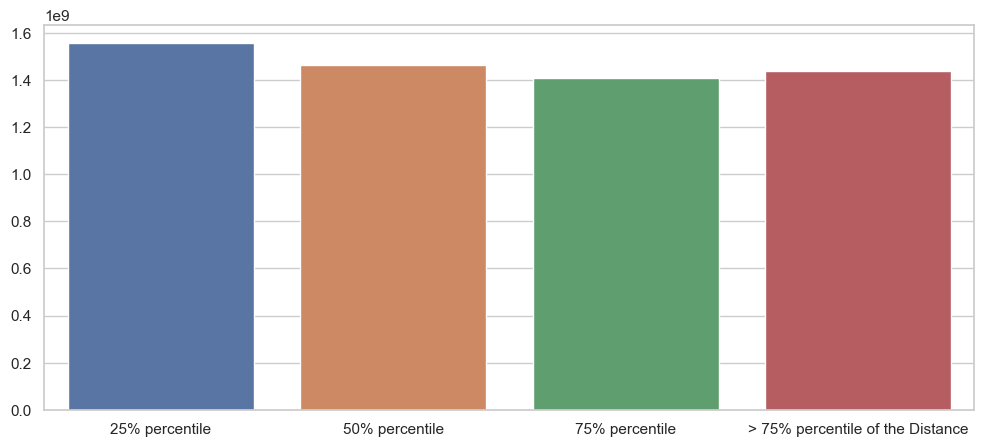

In [87]:
sales_distance = [1556041436, 1462736991, 1406225904, 1436192463]
sales_names = ['25% percentile', '50% percentile', '75% percentile', '> 75% percentile of the Distance']

plt.figure(figsize=(12, 5))
sns.set(style="whitegrid")
sns.barplot(y=sales_distance, x=sales_names)
plt.show()

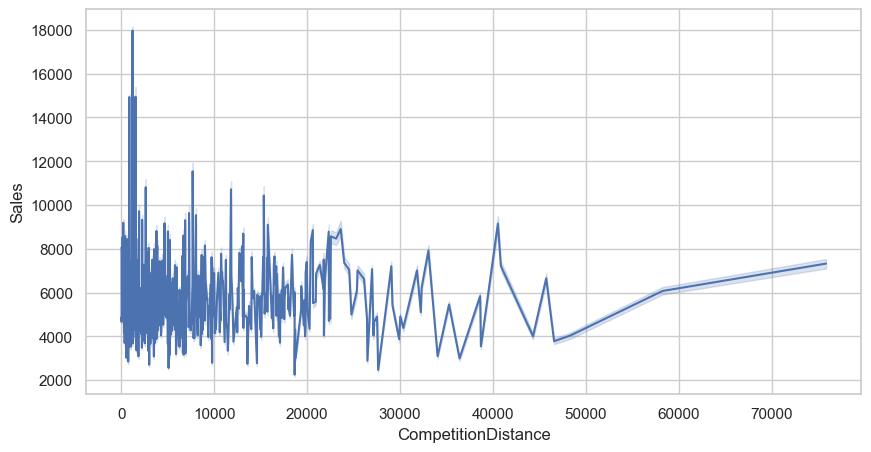

In [86]:
# CompetitionDistance
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.lineplot(x='CompetitionDistance',y='Sales',data=train_store)
plt.show()

**Conclusion- From the above graphs (2 graphs above), the Competitor distance slightly affect the Sales inversely, that is, when the distance increases, the sales slightly decreases.**

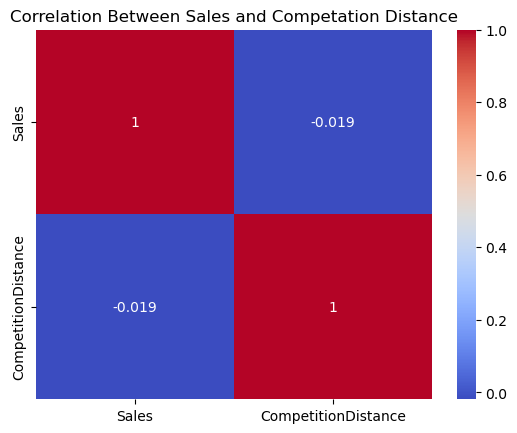

In [85]:
sns.heatmap(train_store[['Sales', 'CompetitionDistance']].corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Between Sales and Competation Distance')
plt.show()

**Observation: The more the closer the stores the higher the sales, and the more the distant the lower the sales.**

# 11- How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on has values for competitor distance ?


In [84]:
train_store["CompetitionOpenSinceYear"].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
          0., 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

## Conclusion of EDA

__1. The most selling and crowded StoreType is A.__

__2. The best "Sale per Customer" StoreType D indicates to the higher Buyer Cart. To benefit from this fact, Rossmann can consider proposing bigger variety of its products.__

__3. Low SalePerCustomer amount for StoreType B indicates to the possible fact that people shop there essentially for "small" things. Eventhough this StoreType generated the least amount of sales and customers over the whole period, it shows a great potential.__

__4. Customers tends to buy more on Modays when there's one promotion (Promo) and on Sundays when there's no promotion at all (both Promo and Promo1 are equal to 0).__

__5. Promo2 alone doesn't seem to be correlated to any significant change in the Sales amount.__